# Creating a simple model of cnn for z by hp challenge 4

**loading stuff and things with cnn hehe :p, enjoy**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow_datasets as tfds
import shutil
import os

In [2]:
#load the stuffs
eterna_path = '../input/z-by-hp-unlocked-challenge-4-image-classification/data_cleaned/Train/la_eterna'
not_eterna_path = '../input/z-by-hp-unlocked-challenge-4-image-classification/data_cleaned/Train/other_flowers'
eterna = os.listdir(eterna_path)
not_eterna = os.listdir(not_eterna_path)

In [3]:
#load the filepaths as stuffs hehe :p
for i in range(len(eterna)):
    eterna[i] = os.path.join(eterna_path,eterna[i])
for i in range(len(not_eterna)):
    not_eterna[i] = os.path.join(not_eterna_path,not_eterna[i])
not_eterna = not_eterna[:200]
print(len(eterna),len(not_eterna))

158 200


In [4]:
#check check
eterna_example = eterna[75]
not_eterna_example = not_eterna[75]

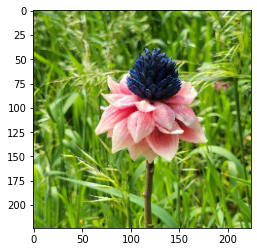

In [5]:
#loading using matplotlib.image library
x1 = img.imread(eterna_example)
plt.imshow(x1)

2022-05-20 17:14:10.592387: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


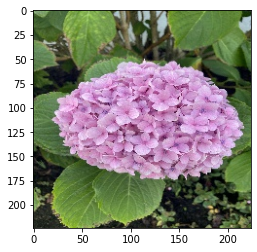

In [6]:
#but we'll have to use tf.io so here's the "thing"
x2 = tf.io.read_file(not_eterna_example)
x2 = tf.io.decode_image(x2)
plt.imshow(x2)

In [7]:
#making a tf dataset for easier pipelining
eterna = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(eterna), tf.data.Dataset.from_tensor_slices(tf.ones(len(eterna)))))
not_eterna = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(not_eterna), tf.data.Dataset.from_tensor_slices(tf.zeros(len(not_eterna)))))
final_df = eterna.concatenate(not_eterna)

In [8]:
#making a map function
def load_image(path,label):
    return tf.io.decode_image(tf.io.read_file(path)),label

#the mcshabap process - courtesy of nicholas renotte
final_df = final_df.map(load_image)
final_df = final_df.cache()
final_df = final_df.shuffle(buffer_size=1000)
final_df = final_df.batch(20)
final_df = final_df.prefetch(12)

In [9]:
#checking to split, here 0.85 means 85 percent data will be training and 15 percent will be test data
len(final_df)*0.85

15.299999999999999

In [10]:
#splitting the dataset hehe :p
train = final_df.take(15)
test = final_df.skip(15).take(3)

In [11]:
#just to see whether it works or not
sample,label = train.as_numpy_iterator().next()
print(sample.shape,label)

2022-05-20 17:14:11.430644: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(20, 224, 224, 3) [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]


In [12]:
shape = sample.shape[1:]

In [13]:
#simple cnn model
def make_model(inp_shape):
    input_ = L.Input((inp_shape))
    x = L.Conv2D(3,(2,2))(input_)
    x = L.Conv2D(3,(2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.MaxPool2D((2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.MaxPool2D((2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.Conv2D(3,(2,2))(x)
    x = L.MaxPool2D((2,2))(x)
    x = L.Flatten()(x)
    x = L.Dense(128,activation = 'relu')(x)
    x = L.Dense(128, activation = 'relu')(x)
    x = L.Dropout(0.3)(x)
    x = L.Dense(128,activation = 'relu')(x)
    x = L.Dense(128, activation = 'relu')(x)
    x = L.Dropout(0.3)(x)
    x = L.Dense(128,activation = 'relu')(x)
    x = L.Dense(128, activation = 'relu')(x)
    x = L.Dropout(0.3)(x)
    output = L.Dense(1, activation = 'sigmoid')(x)
    model = tf.keras.Model(input_,output)
    return model

In [14]:
#doing simple stuffs
model = make_model(shape)
model.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy','mae'])

In [15]:
#train train
hist = model.fit(train, epochs=20, validation_data=test)

Epoch 1/20
15/15 [==============================] - 3s 88ms/step - loss: 2.6316 - accuracy: 0.5100 - mae: 0.4822 - val_loss: 0.7354 - val_accuracy: 0.6207 - val_mae: 0.4568
Epoch 2/20
15/15 [==============================] - 1s 68ms/step - loss: 1.2974 - accuracy: 0.5500 - mae: 0.4723 - val_loss: 0.6356 - val_accuracy: 0.6724 - val_mae: 0.4053
Epoch 3/20
15/15 [==============================] - 1s 66ms/step - loss: 0.7003 - accuracy: 0.6200 - mae: 0.4231 - val_loss: 0.6685 - val_accuracy: 0.6724 - val_mae: 0.4146
Epoch 4/20
15/15 [==============================] - 1s 67ms/step - loss: 0.6064 - accuracy: 0.6833 - mae: 0.4040 - val_loss: 0.4653 - val_accuracy: 0.7931 - val_mae: 0.3365
Epoch 5/20
15/15 [==============================] - 1s 67ms/step - loss: 0.5115 - accuracy: 0.7067 - mae: 0.3484 - val_loss: 0.4927 - val_accuracy: 0.7241 - val_mae: 0.3285
Epoch 6/20
15/15 [==============================] - 1s 68ms/step - loss: 0.4525 - accuracy: 0.7433 - mae: 0.3047 - val_loss: 0.3960 - v

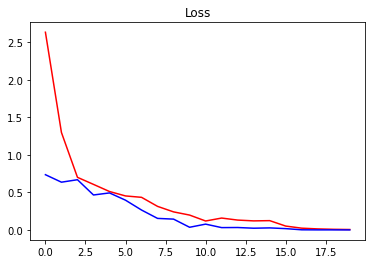

In [16]:
#plotting some stuffs
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

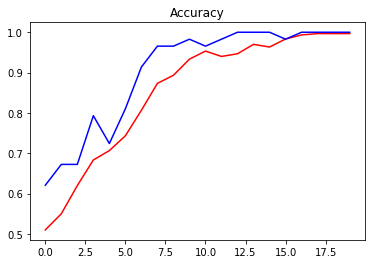

In [17]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.show()

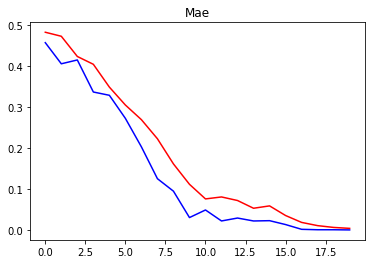

In [18]:
plt.title('Mae')
plt.plot(hist.history['mae'], 'r')
plt.plot(hist.history['val_mae'], 'b')
plt.show()

In [19]:
#some basic testing for stuffs
xtest,ytest = test.as_numpy_iterator().next()

In [20]:
target = model.predict(xtest)

In [21]:
print(target,ytest)

[[9.9999958e-01]
 [4.6077371e-04]
 [9.9999952e-01]
 [8.0270831e-05]
 [8.5550547e-04]
 [1.0000000e+00]
 [3.5001409e-05]
 [9.9923515e-01]
 [6.6697598e-04]
 [3.6880374e-04]
 [4.2486963e-06]
 [1.0000000e+00]
 [1.2362003e-04]
 [9.9995756e-01]
 [2.5383830e-03]
 [1.0000000e+00]
 [9.9992377e-01]
 [1.0000000e+00]
 [1.5369873e-05]
 [2.4408574e-11]] [1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.]


In [22]:
#loading the bigboss i.e final testing dataset

test_file_path = '../input/z-by-hp-unlocked-challenge-4-image-classification/data_cleaned/scraped_images/image_files'
test_files =  os.listdir(test_file_path)
test_file = []
for i in range(len(test_files)):
    test_file.append(test_file_path + '/' + test_files[i])


In [23]:
#again, checking
print(test_files[1],test_file[1])

img_53.jpg ../input/z-by-hp-unlocked-challenge-4-image-classification/data_cleaned/scraped_images/image_files/img_53.jpg


In [24]:
#for testing data
def load_image_test(path):
    return tf.io.decode_image(tf.io.read_file(path))

In [25]:
test_file = pd.Series(test_file)
test_file = test_file.apply(load_image_test)

In [26]:
test_file[1]

<tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[214, 219, 223],
        [236, 243, 249],
        [220, 227, 237],
        ...,
        [122, 130,  57],
        [126, 129,  62],
        [124, 127,  60]],

       [[140, 147, 157],
        [164, 172, 183],
        [153, 161, 174],
        ...,
        [131, 138,  68],
        [135, 140,  73],
        [135, 140,  74]],

       [[100, 111, 129],
        [ 98, 109, 129],
        [104, 115, 137],
        ...,
        [138, 148,  79],
        [143, 152,  87],
        [152, 161,  96]],

       ...,

       [[ 64,  86,  48],
        [ 61,  84,  38],
        [175, 200, 135],
        ...,
        [ 98,  97, 102],
        [ 88,  88,  90],
        [ 92,  92,  92]],

       [[ 58,  81,  29],
        [150, 176, 115],
        [155, 182, 103],
        ...,
        [ 75,  72,  79],
        [ 83,  81,  86],
        [ 75,  73,  76]],

       [[ 70,  94,  36],
        [148, 173, 105],
        [158, 188, 100],
        ...,
        [ 55,  52,  5

In [27]:
test_file_name = []
la_eterna = []
other_flower = []

for i in range(len(test_file)):
    filename = test_files[i][:len(test_files[i])-4]
    x = test_file[i]
    y = model.predict(np.array([x]))[0][0]
    test_file_name.append(filename)
    la_eterna.append(y)
    other_flower.append(1-y)

In [28]:
final_results = pd.DataFrame({'images':test_file_name,'la_eterna':la_eterna,'other_flower':other_flower})

In [29]:
final_results

,images,la_eterna,other_flower
0,img_21,8.478605e-05,0.999915
1,img_53,1.511904e-05,0.999985
2,img_91,1.810690e-06,0.999998
3,img_57,9.967312e-01,0.003269
4,img_07,1.464486e-04,0.999854
...,...,...,...
95,img_96,4.895756e-05,0.999951
96,img_11,4.403305e-02,0.955967
97,img_70,1.404176e-01,0.859582
98,img_04,1.267999e-03,0.998732


In [30]:
#saving
final_results.to_csv('submission_file.csv',index = False)